# formal prediction! good luck!!

In [2]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time
from matplotlib.ticker import MultipleLocator 

%matplotlib inline

path = os.getcwd().split('TianChi_IJCAI-17_footfall_prediction_code')[0]

#shop_info = pd.read_table(path+'dataset/shop_info.txt',names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'],header=None,delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)
shop_info = pd.read_table(path+'dataset/shop info with count.csv',delimiter=',',encoding='utf8',delim_whitespace=False,index_col=False)

shop_info.index = shop_info['shop_id'].tolist()

## 定义基本的函数和计算

In [3]:
def dateRange(start, end):
    days = (datetime.datetime.strptime(end, "%Y-%m-%d") - datetime.datetime.strptime(start, "%Y-%m-%d")).days + 1
    return [datetime.datetime.strftime(datetime.datetime.strptime(start, "%Y-%m-%d") + datetime.timedelta(i), "%Y-%m-%d") for i in xrange(days)]
#len(dateRange('2015-07-01','2016-10-31'))

def date_to_week(date):
    if type(date) == str:
        date = pd.to_datetime(date).date()
    #type(date) == datetime.date
    return (date - datetime.date(2015,7,7)).days  / 7

# 2015-07-07 2015-07-13   

def week_to_date(week_number,return_str=True):
    if week_to_date:
        return [(datetime.date(2015,7,7)+ datetime.timedelta(week_number*7)).strftime("%Y-%m-%d"),(datetime.date(2015,7,13)+ datetime.timedelta(week_number*7)).strftime("%Y-%m-%d")]
    return [datetime.date(2015,7,7)+ datetime.timedelta(week_number*7),datetime.date(2015,7,13)+ datetime.timedelta(week_number*7)]


In [4]:
def cal_start_day(x):
    for day in dateRange('2015-07-01','2016-10-31'):
        if x[day]>0 :
            return day
    

shop_info['start_day'] = shop_info.apply(lambda x:cal_start_day(x),axis =1)

### 定义可视化函数

In [5]:
def draw_week_id(id,start_date='wk_0',end_date='wk_68',figsieze=(16,9)):
    shop_info.loc[id,start_date:end_date].T.plot(figsize=(16,9))
def draw_week_ids(ids,start_date='wk_0',end_date='wk_68',figsieze=(16,9)):
    shop_info.loc[ids,start_date:end_date].T.plot(figsize=(16,9))
def draw_ids(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
        shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize,ax=ax)
    else: shop_info.loc[ids,start_date:end_date].T.plot(figsize=figsize)
    plt.show()
def draw_ids_avg(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=True,figsize=(70,10)):
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[ids,start_date:end_date].mean(axis=0).plot(figsize=figsize)
    plt.show()
def draw_ids_diff(ids,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):  
    if by_week:
        xmajorLocator   = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    (shop_info.loc[ids[0],start_date:end_date]-shop_info.loc[ids[1],start_date:end_date]).plot(figsize=figsize)
def draw_id(id,start_date='2015-07-01',end_date='2016-10-31',by_week=False,figsize=(16,9)):
    if by_week:
        xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
        ax = plt.subplot(111) 
        ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,start_date:end_date].plot(legend=True,figsize=figsize)



###  Data preprocessing

#### 填充 2015.12.12

In [6]:
def fillna_double_12(x):
    if pd.to_datetime(x['start_day']).date() < pd.to_datetime('2015-12-12').date():  
        if x['2015-12-05']>0 and x['2015-12-19']>0 :
            return int(x['2015-12-05'] + x['2015-12-19'] /2.0 +0.5)
        elif x['2015-12-05']>0: return x['2015-12-05']
        elif x['2015-12-19']>0: return x['2015-12-19']
        else: return 0
    return 0
shop_info['2015-12-12'] = shop_info.apply(lambda x:fillna_double_12(x),axis=1)

#### 填充最后三周出现单次零值状况

In [7]:
ids_zero_1_count_in_last_three_week = [513, 987, 1163, 524, 397, 18, 1556, 1688, 5, 1185, 1700, 1959, 683, 1715, 958, 480, 707, 459, 1486, 1831, 722, 735, 352, 363, 1661, 1918]
for day in dateRange('2016-10-11','2016-10-31'):
    for id in ids_zero_1_count_in_last_three_week:
        if shop_info.loc[id,day] == 0:
            day_offset = (pd.to_datetime(day).date() - datetime.date(2016,10,11)).days % 7 
            rel_days = []
            for rel_day in dateRange('2016-10-11','2016-10-31'):
                if (pd.to_datetime(rel_day).date() - datetime.date(2016,10,11)).days % 7 == day_offset and rel_day != day:
                    rel_days.append(shop_info.loc[id,rel_day])
            rel_days = np.array(rel_days)
            shop_info.loc[id,day] = np.int64(rel_days.mean()+0.5)

#### 计算每周count

In [8]:

#  占个格子 &&  cal avg sales count each day
total_day = pd.to_datetime('2016-11-01').date()-pd.to_datetime('2015-07-01').date() 
total_day = total_day.days
total_week = total_day / 7  # 69个
start_day = pd.to_datetime('2016-11-01').date() - datetime.timedelta(total_week*7)
#print start_day
for week_number in range(total_week): # 0~68
    start_day_of_week = start_day +  datetime.timedelta(week_number*7) 
    end_day_of_week = start_day_of_week + datetime.timedelta(6)
    start_day_of_week =   start_day_of_week.strftime("%Y-%m-%d")
    end_day_of_week = end_day_of_week.strftime("%Y-%m-%d")
    print start_day_of_week,end_day_of_week
    shop_info['wk_'+str(week_number)] = shop_info.loc[:,start_day_of_week:end_day_of_week].mean(axis=1)

2015-07-07 2015-07-13
2015-07-14 2015-07-20
2015-07-21 2015-07-27
2015-07-28 2015-08-03
2015-08-04 2015-08-10
2015-08-11 2015-08-17
2015-08-18 2015-08-24
2015-08-25 2015-08-31
2015-09-01 2015-09-07
2015-09-08 2015-09-14
2015-09-15 2015-09-21
2015-09-22 2015-09-28
2015-09-29 2015-10-05
2015-10-06 2015-10-12
2015-10-13 2015-10-19
2015-10-20 2015-10-26
2015-10-27 2015-11-02
2015-11-03 2015-11-09
2015-11-10 2015-11-16
2015-11-17 2015-11-23
2015-11-24 2015-11-30
2015-12-01 2015-12-07
2015-12-08 2015-12-14
2015-12-15 2015-12-21
2015-12-22 2015-12-28
2015-12-29 2016-01-04
2016-01-05 2016-01-11
2016-01-12 2016-01-18
2016-01-19 2016-01-25
2016-01-26 2016-02-01
2016-02-02 2016-02-08
2016-02-09 2016-02-15
2016-02-16 2016-02-22
2016-02-23 2016-02-29
2016-03-01 2016-03-07
2016-03-08 2016-03-14
2016-03-15 2016-03-21
2016-03-22 2016-03-28
2016-03-29 2016-04-04
2016-04-05 2016-04-11
2016-04-12 2016-04-18
2016-04-19 2016-04-25
2016-04-26 2016-05-02
2016-05-03 2016-05-09
2016-05-10 2016-05-16
2016-05-17

#### 计算倒数三周之间的余弦相似度

In [9]:
wk1=['2016-10-11','2016-10-17']
wk2=['2016-10-18','2016-10-24']
wk3=['2016-10-25','2016-10-31']
def cal_cos_sim_between(x,wka,wkb):
    wka_vec =  np.array(x[wka[0]:wka[1]].tolist())
    wkb_vec =  np.array(x[wkb[0]:wkb[1]].tolist())
    sim = wka_vec.dot(wkb_vec) / (np.sqrt(np.sum(np.square(wka_vec))) * np.sqrt(np.sum(np.square(wkb_vec))))
    return sim
shop_info['cos_sim_between_wk_1_2'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk1,wk2),axis=1)
shop_info['cos_sim_between_wk_2_3'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk2,wk3),axis=1)
shop_info['cos_sim_between_wk_1_3'] = shop_info.apply(lambda x: cal_cos_sim_between(x,wk1,wk3),axis=1)

In [10]:
shop_info['cos_sim_between_wk_1_2'].replace(np.NaN,0.0,inplace=True)
shop_info['cos_sim_between_wk_2_3'].replace(np.NaN,0.0,inplace=True)
shop_info['cos_sim_between_wk_1_3'].replace(np.NaN,0.0,inplace=True)

#### 计算每一周与下一周之间的余弦相似度

In [11]:
def cal_cos_sim(x,start_day_of_week,end_day_of_week,start_day_of_next_week,end_day_of_next_week):
    wka_vec =  np.array(x[start_day_of_week:end_day_of_week].tolist())
    wkb_vec =  np.array(x[start_day_of_next_week:end_day_of_next_week].tolist())
    sim = wka_vec.dot(wkb_vec) / (np.sqrt(np.sum(np.square(wka_vec))) * np.sqrt(np.sum(np.square(wkb_vec))))
    return sim 
    
    
total_day = pd.to_datetime('2016-11-01').date()-pd.to_datetime('2015-07-01').date() 
total_day = total_day.days
total_week = total_day / 7
start_day = pd.to_datetime('2015-07-07').date()
for week_number in range(total_week-1): # 0 ~ 68-1
    start_day_of_week = start_day +  datetime.timedelta(week_number*7) 
    end_day_of_week = start_day_of_week + datetime.timedelta(6)
    start_day_of_next_week = start_day_of_week + datetime.timedelta(7)
    end_day_of_next_week = end_day_of_week + datetime.timedelta(7)
    start_day_of_week = start_day_of_week.strftime("%Y-%m-%d")
    end_day_of_week = end_day_of_week.strftime("%Y-%m-%d")
    start_day_of_next_week = start_day_of_next_week.strftime("%Y-%m-%d")
    end_day_of_next_week = end_day_of_next_week.strftime("%Y-%m-%d")
    shop_info['cos_sim_wk_'+str(week_number)] = shop_info.apply(lambda x: cal_cos_sim(x,start_day_of_week,end_day_of_week,start_day_of_next_week,end_day_of_next_week),axis=1)

#### 找出稳定时间段（时间段类各周的余弦相似度高）

In [12]:
def show_stable_period_id(id,i):
    stable_periods = shop_info.loc[id,'stable_period_'+str(i)]
    for sp in stable_periods:
        print 'id :',id, week_to_date(sp[0])[0], week_to_date(sp[1])[1]
        

In [13]:
def cal_stable_period(x,base_sim):
    print x['shop_id']
    stable_period = []
    next_start_wk = 0
    for wk in range(0,66):
        if next_start_wk != 0 and wk != next_start_wk : 
            #print 'next_start_wk =',next_start_wk,'continue'
            continue
        #print wk
        next_start_wk = 0
        if x['cos_sim_wk_'+str(wk)] >  base_sim:
            #print x['shop_id'],'aa'
            for wknext in range(wk + 1,67):
                if x['cos_sim_wk_'+str(wknext)] > base_sim :
                    if wknext == 66:
                        stable_period.append([wk,wknext]) # wk~wknext(不包括wknext)
                        #print [wk,wknext]
                        next_start_wk = wknext
                        break
                    else:    
                        #print x['shop_id'],'bbbb'
                        pass
                else:
                    if wknext - wk >= 3 : 
                        stable_period.append([wk,wknext]) # wk~wknext(不包括wknext)
                        print [wk,wknext]
                        next_start_wk = wknext
                    else:
                        next_start_wk = 0
                    break #结束子循环
    #print 'id= ',x['shop_id'],stable_period
    return stable_period
shop_info['stable_period_1'] = shop_info.apply(lambda x: cal_stable_period(x,0.99),axis = 1)
shop_info['stable_period_2'] = shop_info.apply(lambda x: cal_stable_period(x,0.98),axis = 1)
shop_info['stable_period_3'] = shop_info.apply(lambda x: cal_stable_period(x,0.96),axis = 1)

1
[51, 55]
[57, 61]
2
[43, 46]
[58, 61]
3
4
5
6
7
[49, 53]
8
9
[33, 37]
[42, 47]
[50, 63]
10
11
12
13
[48, 58]
14
[26, 29]
15
16
17
18
19
[49, 55]
[57, 60]
20
21
22
[17, 20]
23
[43, 47]
[49, 52]
[56, 61]
24
25
26
27
[57, 61]
28
29
30
31
[54, 61]
32
[32, 37]
[49, 55]
33
34
[39, 42]
[51, 56]
[57, 61]
35
[49, 58]
36
37
38
39
40
[57, 61]
41
42
43
[57, 60]
44
[51, 55]
45
46
[54, 61]
47
48
[56, 61]
49
[25, 28]
[31, 35]
[43, 47]
50
51
[15, 20]
52
53
[52, 59]
54
[42, 48]
[54, 57]
[58, 64]
55
[48, 56]
[58, 63]
56
57
[26, 29]
58
[18, 21]
[22, 29]
[32, 35]
[37, 48]
[50, 59]
59
[50, 53]
60
61
62
63
[57, 61]
64
65
[32, 36]
[51, 54]
[57, 61]
66
67
[55, 61]
68
69
70
71
72
[33, 40]
[44, 47]
[48, 54]
[56, 61]
73
74
75
76
77
78
[58, 61]
79
[49, 55]
[56, 59]
80
[52, 55]
81
82
[12, 15]
[16, 20]
83
[52, 56]
84
[56, 61]
85
[52, 55]
86
87
[49, 54]
[58, 61]
88
[14, 17]
[43, 46]
89
90
[50, 56]
[57, 62]
91
92
[51, 57]
[58, 61]
93
94
95
96
[54, 62]
97
98
99
100
[32, 35]
[44, 47]
[49, 52]
[55, 58]
101
102
103
104

#### ids_stable_period_**
#### 看看有没有 没有 stable_period的

In [14]:
ids_stable_period_1 = [];ids_stable_period_2=[];ids_stable_period_3=[];ids_no_stable_period=[]
for id in shop_info.index.tolist():
    if len(shop_info.loc[id,'stable_period_1'])>0:
        ids_stable_period_1.append(id)
    elif len(shop_info.loc[id,'stable_period_2'])>0:
        ids_stable_period_2.append(id)
    elif len(shop_info.loc[id,'stable_period_3'])>0:
        ids_stable_period_3.append(id)
    else:
        ids_no_stable_period.append(id)
print len(ids_stable_period_1),len(ids_stable_period_2),len(ids_stable_period_3),len(ids_no_stable_period)

# ids_stable_period_2
# ids_stable_period_3
# ids_no_stable_period

888 803 258 51


### 最后三周出现多次零值的 mess 仅作预测趋势不做预测波动

In [15]:

ids_zero_morethan1_count_in_last_three_week = [2, 1707, 1925, 1418, 659, 1053, 1797, 1824, 547, 810, 432, 1459, 1462, 1464, 1465, 700, 191, 1858, 1993, 1109, 470,1243, 1380, 444, 1269, 632]



#### 最后三周均值很低的

In [16]:
ids_low_count_in_last_3_wk = shop_info[shop_info.loc[:,'2016-10-11':'2016-10-31'].mean(axis=1)<50].index.tolist()
print len(ids_low_count_in_last_3_wk)
#draw_ids(ids_low_count_in_last_3_wk[:5],start_date='2016-02-11',end_date='2016-10-31',by_week=True)

103


#### 最后三周出现相对三周内极高点的

In [17]:
ids_highest_point_error_compared_to_last_three_days = []
def cal_highest_point_error_compared_to_last_three_days(x):
    sales_list = sorted(x['2016-10-11':'2016-10-31'].tolist(),reverse=True)
    if sales_list[1] > 0:
        if 1.0 * sales_list[0] / sales_list[1] > 1.2:
            ids_highest_point_error_compared_to_last_three_days.append(x['shop_id'])
shop_info.apply(lambda x: cal_highest_point_error_compared_to_last_three_days(x) ,axis=1)
print len(ids_highest_point_error_compared_to_last_three_days)
#draw_ids(ids_highest_point_error_compared_to_last_three_days,start_date='2016-10-11',end_date='2016-10-31',by_week=True)

154


#### 最后三周出现相对三周内极低点的

In [18]:
ids_lowest_point_error_compared_to_last_three_days = []
def cal_lowest_point_error_compared_to_last_three_days(x):
    sales_list = sorted(x['2016-10-11':'2016-10-31'].tolist())
    if sales_list[1] > 0:
        if 1.0 * sales_list[0] / sales_list[1] < 0.7:
            ids_lowest_point_error_compared_to_last_three_days.append(x['shop_id'])
shop_info.apply(lambda x: cal_lowest_point_error_compared_to_last_three_days(x) ,axis=1)
print len(ids_lowest_point_error_compared_to_last_three_days)

#draw_ids(ids_lowest_point_error_compared_to_last_three_days,start_date='2016-10-11',end_date='2016-10-31',by_week=True)

167


#### 波动幅度

In [19]:
def cal_wave_range(x):
    sales_count = sorted(x['2016-10-11':'2016-10-31'].tolist())
    if sum(sales_count[18:]) == 0 :return 0
    return (sum(sales_count[18:]) - sum(sales_count[:3]))/float(sum(sales_count[18:]))
shop_info['wave_range'] = shop_info.apply(lambda x: cal_wave_range(x),axis = 1)

#### 三周的余弦相似度过低

In [20]:
ids_cos_sim_low_between_wk_1_2 = shop_info[shop_info['cos_sim_between_wk_1_2']<0.98].index.tolist()
ids_cos_sim_low_between_wk_2_3 = shop_info[shop_info['cos_sim_between_wk_2_3']<0.98].index.tolist()
ids_cos_sim_low_between_wk_1_3 = shop_info[shop_info['cos_sim_between_wk_1_3']<0.98].index.tolist()
ids_cos_sim_low_3_wk = []
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_1_2)
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_2_3)
ids_cos_sim_low_3_wk.extend(ids_cos_sim_low_between_wk_1_3)
ids_cos_sim_low_3_wk = list(set(ids_cos_sim_low_3_wk))
print len(ids_cos_sim_low_between_wk_1_2)
print len(ids_cos_sim_low_between_wk_2_3)
print len(ids_cos_sim_low_between_wk_1_3)
print len(ids_cos_sim_low_3_wk)
ids_cos_sim_high_3_wk =[ i  for i in shop_info.index.tolist() if i not in ids_cos_sim_low_3_wk]
print len(ids_cos_sim_high_3_wk)
ids_cos_sim_high_23_wk = [i for i in shop_info[shop_info['cos_sim_between_wk_2_3']>0.98].index.tolist() if i not in ids_cos_sim_high_3_wk and i in  shop_info[shop_info['cos_sim_between_wk_1_2']>0.95].index.tolist()]
print len(ids_cos_sim_high_23_wk)

ids_cos_sim_low_3_wk_other = [i for i in ids_cos_sim_low_3_wk if i not in ids_cos_sim_high_23_wk]
print len(ids_cos_sim_low_3_wk_other)

579
678
540
970
1030
271
699


In [21]:
ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week=[1053, 432, 1464, 1465, 1993, 1109, 1269]

In [22]:
ids_no_zero_count_in_last_three_week = [i for i in shop_info.index.tolist() if i not in ids_zero_morethan1_count_in_last_three_week and i not in  ids_cos_sim_high_3_wk]

In [23]:
ids_zero_morethan1_count_in_last_three_week_and_two_week = [i for i in ids_zero_morethan1_count_in_last_three_week if i not in ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week]

In [24]:
print len(ids_zero_morethan1_count_in_last_three_week_and_two_week)

19


In [25]:
ids_stable_period_1_2_3 = []
ids_stable_period_1_2_3.extend(ids_stable_period_1)
ids_stable_period_1_2_3.extend(ids_stable_period_2)
ids_stable_period_1_2_3.extend(ids_stable_period_3)

# 波动模型

In [26]:
## 先对每周波动做归一化 ：每天的值除以对应的当周的均值

# int 转化为 float
indexlist = shop_info.index.tolist()
for day in dateRange('2015-07-01','2016-10-31'):
    print day
    for id in indexlist:
        shop_info.loc[id,day] = float(shop_info.loc[id,day])
        


for day in dateRange('2015-07-07','2016-10-31'):
    wk_number = date_to_week(day)
    for id in shop_info.index.tolist():
        if shop_info.loc[id,day] > 0 :
            shop_info.loc[id,day] /= shop_info.loc[id,'wk_'+str(wk_number)]
            

In [27]:
shop_info.loc[:,'2015-07-07':'2016-10-31'].head()

,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
1,0,0,0,0,0,0,0,0,0,0,...,202,243,216,255,172,226,257,251,281,180
2,0,0,0,0,0,0,0,0,0,0,...,155,143,78,82,97,83,96,96,115,80
3,0,0,0,0,0,0,0,0,0,0,...,127,125,47,80,61,68,103,102,104,67
4,0,0,0,0,0,0,0,0,0,0,...,211,221,81,90,104,55,110,215,196,115
5,0,0,0,0,0,0,0,0,0,0,...,161,240,454,302,1,226,215,203,291,239


### related ids
ids_zero_morethan1_count_in_last_three_week
ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week
ids_zero_morethan1_count_in_last_three_week_and_two_week
ids_no_zero_count_in_last_three_week
ids_zero_1_count_in_last_three_week
ids_low_count_in_last_3_wk
shop_info['wave_range']
ids_cos_sim_low_3_wk(不用这个)
ids_cos_sim_high_3_wk
ids_cos_sim_high_23_wk
ids_cos_sim_low_3_wk_other
ids_stable_period_1
ids_stable_period_2
ids_stable_period_3
ids_stable_period_1_2_3
ids_no_stable_period


## 三个wave model
## wave_model1 : 根据三周余弦相似度计算

### 三周余弦相似度大于0.98者  ids_cos_sim_high_3_wk 计算三周均值wave model

In [28]:
start_day = (pd.to_datetime('2016-11-01').date() - datetime.timedelta(21)).strftime("%Y-%m-%d") 
for day_number in range(1,8): # 1~7
    shop_info.loc[:,'wave_model1_'+str(day_number)] = 0.0
    predict_day = '2016-11-'+'%02d' %  day_number
    predict_day = pd.to_datetime(predict_day).date()
    day_list = [day for day in dateRange(start_day,'2016-10-31') if (predict_day - pd.to_datetime(day).date()).days % 7 == 0]
    shop_info.loc[ids_cos_sim_high_3_wk,'wave_model1_'+str(day_number)] = shop_info.loc[ids_cos_sim_high_3_wk,day_list].mean(axis=1)

#shop_info['wave_model1_1']

#### 余弦相似度 第一周大于0.95，第二三周大于0.98者 ids_cos_sim_high_23_wk ;  wave model 取 0.1*1＋ 0.25* 2+0.25*3

In [29]:
start_day = (pd.to_datetime('2016-11-01').date() - datetime.timedelta(21)).strftime("%Y-%m-%d") 
for day_number in range(1,8): # 1~7
    #shop_info.loc[:,'wave_model1_'+str(day_number)] = 0.0
    predict_day = '2016-11-'+'%02d' %  day_number
    predict_day = pd.to_datetime(predict_day).date()
    day_list = [day for day in dateRange(start_day,'2016-10-31') if (predict_day - pd.to_datetime(day).date()).days % 7 == 0]
    for id in ids_cos_sim_high_23_wk:
        shop_info.loc[id,'wave_model1_'+str(day_number)] = (2*shop_info.loc[id,day_list][0]+5*shop_info.loc[id,day_list][1]+5*shop_info.loc[id,day_list][2])/12.0
    

In [30]:
shop_info['wave_model1_1']

1       251.000000
2         0.000000
3        69.250000
4        88.666667
5         0.000000
6        97.583333
7       121.666667
8         0.000000
9       205.000000
10        0.000000
11       98.583333
12       41.666667
13      249.666667
14       58.333333
15      117.333333
16        0.000000
17       84.333333
18        0.000000
19        0.000000
20      164.333333
21       68.000000
22       95.666667
23        0.000000
24        0.000000
25      113.666667
26       58.333333
27       78.250000
28        0.000000
29       82.333333
30       32.666667
           ...    
1971      0.000000
1972     67.416667
1973      0.000000
1974      0.000000
1975    166.333333
1976     78.333333
1977    129.083333
1978    190.666667
1979     57.333333
1980     45.000000
1981      0.000000
1982      0.000000
1983    110.000000
1984     66.333333
1985    428.666667
1986      0.000000
1987      0.000000
1988      0.000000
1989     64.250000
1990     88.000000
1991    141.333333
1992     59.

#### 余弦相似度低者分类  ids_cos_sim_low_3_wk_other   wave model 取 1:1:1 ?? 后3周权重较低

In [31]:
start_day = (pd.to_datetime('2016-11-01').date() - datetime.timedelta(21)).strftime("%Y-%m-%d") 
for day_number in range(1,8): # 1~7
    
    predict_day = '2016-11-'+'%02d' %  day_number
    predict_day = pd.to_datetime(predict_day).date()
    day_list = [day for day in dateRange(start_day,'2016-10-31') if (predict_day - pd.to_datetime(day).date()).days % 7 == 0]
    shop_info.loc[ids_cos_sim_low_3_wk_other,'wave_model1_'+str(day_number)] = shop_info.loc[ids_cos_sim_low_3_wk_other,day_list].mean(axis=1)

#shop_info['wave_model1_1']

## wave_model2 : 根据同个商家id稳定部分计算

In [32]:
for day_number in range(1,8): # 1~7
    shop_info.loc[:,'wave_model2_'+str(day_number)] = 0.0
def get_avg_from_stable_period_(id,n):
    wks = shop_info.loc[id,'stable_period_'+str(n)]
    day_list = []
    for wk_pair in wks:
        wk_start_date = week_to_date(wk_pair[0])[0]
        wk_end_date = week_to_date(wk_pair[1])[1]
        day_list.extend(dateRange(wk_start_date,wk_end_date))
    #print day_list
    #print len(day_list)
    if len(day_list) % 7 != 0 : print 'ERROR'
    #week_number = len(day_list)/7
    for day_number in range(1,8): # 1~7
        predict_day = '2016-11-'+'%02d' %  day_number
        predict_day = pd.to_datetime(predict_day).date()
        train_day_list = [day for day in day_list if (predict_day - pd.to_datetime(day).date()).days % 7 == 0]
        #print train_day_list
        shop_info.loc[id,'wave_model2_'+str(day_number)] =  shop_info.loc[id,train_day_list].mean()     

for id in ids_stable_period_1:
    get_avg_from_stable_period_(id,1)
for id in ids_stable_period_2:
    get_avg_from_stable_period_(id,2)
for id in ids_stable_period_3:
    get_avg_from_stable_period_(id,3)
        


In [33]:
shop_info.loc[:,'wave_model2_1':'wave_model2_7']

,wave_model2_1,wave_model2_2,wave_model2_3,wave_model2_4,wave_model2_5,wave_model2_6,wave_model2_7
1,242.166667,233.500000,245.916667,257.750000,250.833333,234.416667,233.833333
2,88.750000,96.250000,83.375000,90.125000,117.500000,123.000000,91.750000
3,68.142857,71.142857,66.285714,73.428571,81.142857,84.571429,69.000000
4,94.000000,115.428571,102.857143,114.857143,201.714286,220.142857,110.142857
5,294.428571,269.000000,260.285714,217.142857,215.428571,197.142857,309.000000
6,51.600000,46.600000,49.000000,62.400000,57.800000,58.600000,59.000000
7,161.200000,152.200000,170.200000,184.800000,166.000000,212.000000,162.000000
8,87.250000,106.500000,88.000000,95.250000,92.750000,86.000000,75.250000
9,197.360000,205.520000,197.320000,203.760000,230.080000,238.040000,200.160000
10,53.000000,66.000000,50.600000,52.600000,57.400000,72.400000,61.400000


## wave_model3 : 根据这个商家的近似（地点、类型、规模、过去曲线）而且稳定商家来预测不稳定商家

## 最后根据 不同的分类来按照不同的比例融合 wave_model_total

In [34]:
for i in range(1,8):
    shop_info['wave_model_total_'+str(i)] = 0.0

#### ids_cos_sim_high_3_wk

In [35]:
for i in range(1,8):
    for id in ids_cos_sim_high_3_wk:       
        shop_info.loc[id,'wave_model_total_'+str(i)] = shop_info.loc[id,'wave_model1_'+str(i)]
#print shop_info.loc[ids_cos_sim_high_3_wk,'wave_model_total_1':'wave_model_total_7']


#### ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week 把三周均值改为两周均值

In [36]:
start_day = (pd.to_datetime('2016-11-01').date() - datetime.timedelta(14)).strftime("%Y-%m-%d") 
for id in ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week:
    for day_number in range(1,8): # 1~7
        predict_day = '2016-11-'+'%02d' %  day_number
        predict_day = pd.to_datetime(predict_day).date()
        day_list = [day for day in dateRange(start_day,'2016-10-31') if (predict_day - pd.to_datetime(day).date()).days % 7 == 0]
        shop_info.loc[id,'wave_model1_'+str(day_number)] = shop_info.loc[id,day_list].mean()

    if id in ids_stable_period_1_2_3:
        for i in range(1,8):
            shop_info.loc[id,'wave_model_total_'+str(i)] = 0.5* shop_info.loc[id,'wave_model1_'+str(i)] + 0.5* shop_info.loc[id,'wave_model2_'+str(i)] 
           
    else :
        for i in range(1,8):
            shop_info.loc[id,'wave_model_total_'+str(i)] = shop_info.loc[id,'wave_model1_'+str(i)]
        

In [37]:
#shop_info.loc[ids_zero_morethan1_count_in_last_three_week_but_no_zero_in_last_two_week,:]

#### ids_zero_morethan1_count_in_last_three_week_and_two_week

In [38]:
for id in ids_zero_morethan1_count_in_last_three_week_and_two_week:
    if id in ids_stable_period_1_2_3:
        for i in range(1,8):
            shop_info.loc[id,'wave_model_total_'+str(i)] = shop_info.loc[id,'wave_model2_'+str(i)]
    else: # 最好根据相似商家融合
        for i in range(1,8):
            shop_info.loc[id,'wave_model_total_'+str(i)] = shop_info.loc[id,'wave_model1_'+str(i)]
        

In [39]:
shop_info.loc[ids_zero_morethan1_count_in_last_three_week_and_two_week,'wave_model2_1':'wave_model2_7']

,wave_model2_1,wave_model2_2,wave_model2_3,wave_model2_4,wave_model2_5,wave_model2_6,wave_model2_7
2,88.750000,96.250000,83.375000,90.125000,117.500000,123.000000,91.750000
1707,392.750000,383.750000,391.000000,294.000000,264.000000,336.000000,401.000000
1925,36.916667,32.333333,36.500000,45.833333,82.666667,66.416667,38.333333
1418,44.500000,45.500000,44.750000,37.250000,39.750000,41.000000,48.000000
659,139.750000,151.750000,152.500000,167.000000,132.500000,72.250000,150.250000
1797,131.200000,114.200000,133.200000,129.400000,56.200000,45.200000,132.400000
1824,39.600000,46.400000,47.400000,71.200000,56.000000,49.800000,50.400000
547,79.250000,97.000000,95.000000,101.250000,99.250000,88.750000,79.750000
810,131.250000,156.000000,133.750000,137.750000,67.000000,71.500000,156.750000
1459,63.230769,71.461538,67.769231,89.000000,108.000000,102.461538,65.230769


ids_cos_sim_high_23_wk
ids_cos_sim_low_3_wk_other
ids_stable_period_1_2_3
ids_no_stable_period
#### ids_cos_sim_high_23_wk & ids_no_zero_count_in_last_three_week  & ids_stable_period_1_2_3

In [40]:
for id in [i for i in ids_no_zero_count_in_last_three_week if i in ids_cos_sim_high_23_wk and i in ids_stable_period_1_2_3]:
    for i in range(1,8):
        shop_info.loc[id,'wave_model_total_'+str(i)] = 0.6* shop_info.loc[id,'wave_model1_'+str(i)] + 0.4* shop_info.loc[id,'wave_model2_'+str(i)] 
           

#### ids_cos_sim_high_23_wk & ids_no_zero_count_in_last_three_week  & ids_no_stable_period

In [41]:
for id in [i for i in ids_no_zero_count_in_last_three_week if i in ids_cos_sim_high_23_wk and i in ids_no_stable_period]:
    for i in range(1,8):
        shop_info.loc[id,'wave_model_total_'+str(i)] =  shop_info.loc[id,'wave_model1_'+str(i)]

#### ids_cos_sim_low_3_wk_other & ids_no_zero_count_in_last_three_week  & ids_stable_period_1_2_3

In [42]:
for id in [i for i in ids_no_zero_count_in_last_three_week if i in ids_cos_sim_low_3_wk_other and i in ids_stable_period_1_2_3]:
    for i in range(1,8):
        shop_info.loc[id,'wave_model_total_'+str(i)] = 0.3* shop_info.loc[id,'wave_model1_'+str(i)] + 0.7* shop_info.loc[id,'wave_model2_'+str(i)] 
        

#### ids_cos_sim_low_3_wk_other & ids_no_zero_count_in_last_three_week  & ids_no_stable_period

In [43]:
for id in [i for i in ids_no_zero_count_in_last_three_week if i in ids_cos_sim_low_3_wk_other and i in ids_no_stable_period]:
    for i in range(1,8):
        shop_info.loc[id,'wave_model_total_'+str(i)] =  shop_info.loc[id,'wave_model1_'+str(i)] 

In [44]:
shop_info['wave_model_total_3']

1       220.333333
2        83.375000
3        71.114286
4        61.666667
5       249.900000
6        80.350000
7       117.333333
8        82.600000
9       221.000000
10       60.520000
11       74.236364
12       71.800000
13      236.666667
14       51.666667
15      127.666667
16       43.880000
17       82.333333
18       64.600000
19      151.354545
20      153.333333
21       70.333333
22       99.000000
23      117.153333
24       78.566667
25      108.666667
26       71.666667
27       86.340000
28       61.600000
29       92.000000
30       42.333333
           ...    
1971    226.700000
1972     72.030000
1973     58.194737
1974    133.909091
1975    166.000000
1976     91.000000
1977    137.090000
1978    180.000000
1979     58.666667
1980     46.000000
1981     67.754545
1982     72.250000
1983     91.250000
1984     61.333333
1985    477.666667
1986     87.500000
1987     51.080000
1988    179.105882
1989     47.500000
1990     81.666667
1991    133.333333
1992     63.

## 低值 boost

for id in ids_cos_sim_low_3_wk_other:
    for i in range(1,8):
        if shop_info.loc[id,'wave_model_total_'+str(i)] <50:
            print 'old',shop_info.loc[id,'wave_model_total_'+str(i)]
            shop_info.loc[id,'wave_model_total_'+str(i)] *= (50-shop_info.loc[id,'wave_model_total_'+str(i)])*0.2/50 + 1
            print 'new',shop_info.loc[id,'wave_model_total_'+str(i)]

# 趋势模型

In [45]:
shop_info['ratio'] = shop_info.loc[:,'wk_66':'wk_68'].mean(axis = 1) / shop_info.loc[:,'wave_model_total_1':'wave_model_total_7'].mean(axis = 1)

In [46]:
shop_info['wave_model_total_1'] 

1       251.000000
2        88.750000
3        68.807143
4        88.666667
5       278.700000
6        79.190000
7       121.666667
8        81.075000
9       205.000000
10       64.600000
11       82.822727
12       48.950000
13      249.666667
14       58.333333
15      117.333333
16       43.800000
17       84.333333
18       57.300000
19      139.290909
20      164.333333
21       68.000000
22       95.666667
23      113.606667
24       72.400000
25      113.666667
26       58.333333
27       84.710000
28       58.233333
29       82.333333
30       32.666667
           ...    
1971    242.000000
1972     64.630000
1973     56.484211
1974    149.518182
1975    166.333333
1976     78.333333
1977    127.810000
1978    190.666667
1979     57.333333
1980     45.000000
1981     60.972727
1982     71.450000
1983     87.100000
1984     66.333333
1985    428.666667
1986     87.400000
1987     43.720000
1988    167.194118
1989     53.650000
1990     88.000000
1991    141.333333
1992     63.

In [47]:
for i in range(1,8):
    shop_info.loc[:,'wave_model_total_'+str(i)] = shop_info['ratio'] * shop_info.loc[:,'wave_model_total_'+str(i)]

In [48]:
for i in range(1,15):
    if i <= 7:
        shop_info.loc[:,'predict_day_'+str(i)] = shop_info.loc[:,'wave_model_total_'+str(i)]
    else:
        shop_info.loc[:,'predict_day_'+str(i)] = shop_info.loc[:,'wave_model_total_'+str(i-7)]

In [49]:
shop_info.loc[:,'predict_day_1':'predict_day_14']

,predict_day_1,predict_day_2,predict_day_3,predict_day_4,predict_day_5,predict_day_6,predict_day_7,predict_day_8,predict_day_9,predict_day_10,predict_day_11,predict_day_12,predict_day_13,predict_day_14
1,251.000000,196.000000,220.333333,243.666667,239.000000,262.666667,201.000000,251.000000,196.000000,220.333333,243.666667,239.000000,262.666667,201.000000
2,46.511039,50.441549,43.694173,47.231632,61.577995,64.460369,48.083243,46.511039,50.441549,43.694173,47.231632,61.577995,64.460369,48.083243
3,71.628712,70.535655,74.030464,91.578866,105.773739,104.911191,66.208040,71.628712,70.535655,74.030464,91.578866,105.773739,104.911191,66.208040
4,88.666667,109.666667,61.666667,103.666667,197.000000,205.666667,95.000000,88.666667,109.666667,61.666667,103.666667,197.000000,205.666667,95.000000
5,255.769678,212.177788,229.339227,194.282170,188.775826,194.741032,287.247611,255.769678,212.177788,229.339227,194.282170,188.775826,194.741032,287.247611
6,97.187830,96.635557,98.611468,119.119217,102.563290,105.103747,97.445558,97.187830,96.635557,98.611468,119.119217,102.563290,105.103747,97.445558
7,121.666667,100.666667,117.333333,133.333333,166.666667,190.000000,113.333333,121.666667,100.666667,117.333333,133.333333,166.666667,190.000000,113.333333
8,65.429435,75.174245,66.660146,65.429435,71.845273,69.646134,56.148664,65.429435,75.174245,66.660146,65.429435,71.845273,69.646134,56.148664
9,205.000000,204.000000,221.000000,203.333333,254.000000,291.666667,237.333333,205.000000,204.000000,221.000000,203.333333,254.000000,291.666667,237.333333
10,88.054523,112.589839,82.493185,85.219331,91.162330,111.472119,96.342007,88.054523,112.589839,82.493185,85.219331,91.162330,111.472119,96.342007


## 双十一 boost

# 天气模型

# 浏览量模型

# 可视化预测结果

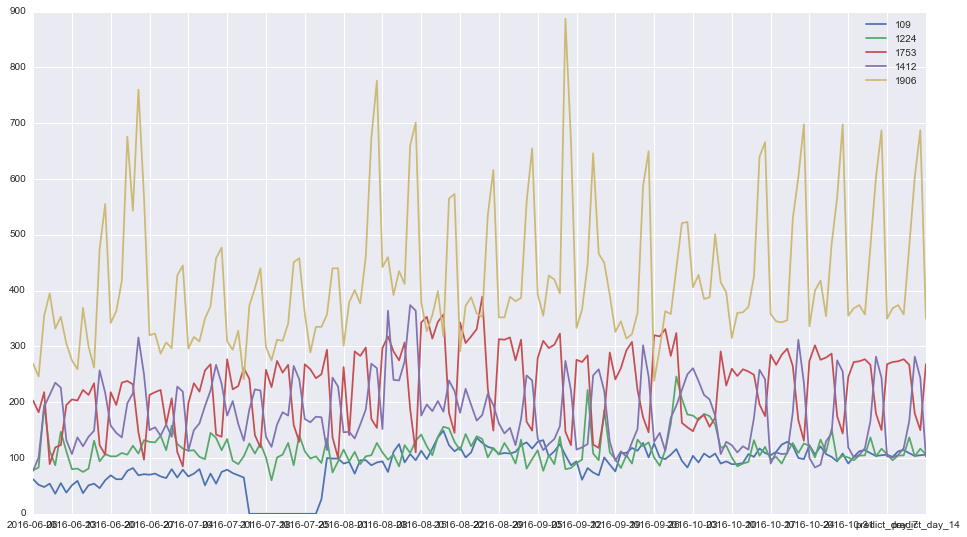

In [95]:
list_result = dateRange('2016-06-06','2016-10-31')
for i in range(1,15):
    list_result.append('predict_day_'+str(i))
xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
ax = plt.subplot(111) 
ax.xaxis.set_major_locator(xmajorLocator)
shop_info.loc[np.random.choice(ids_cos_sim_high_3_wk,5) ,list_result].T.plot(figsize=(16,9),ax=ax)

### 和回归模型对比结果

In [100]:
regression_predict = pd.read_csv('regression_prediction.csv',index_col=0)

In [102]:
shop_info = shop_info.join(regression_predict)

In [167]:
def draw_rule_and_reg_id(id):
    plt.title(str(id))
    list_result = dateRange('2016-06-06','2016-10-31')
    for i in range(1,15):
        list_result.append('predict_day_'+str(i))
    xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
    ax = plt.subplot(111) 
    ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id ,list_result].T.plot(figsize=(16,9),ax=ax)
    

    list_result = dateRange('2016-06-06','2016-10-31')
    for i in range(1,8):
        list_result.append('predict_'+str(i))

    xmajorLocator = MultipleLocator(7) #将x轴次刻度标签设置为7的倍数
    ax = plt.subplot(111) 
    ax.xaxis.set_major_locator(xmajorLocator)
    shop_info.loc[id,list_result].T.plot(figsize=(16,9),ax=ax)
    plt.show()


In [189]:
shop_info.loc[56,'cos_sim_wk_66']

0.97284796663218964

In [226]:
show_stable_period_id(182,3)

id : 182 2016-03-15 2016-05-02
id : 182 2016-06-14 2016-07-11


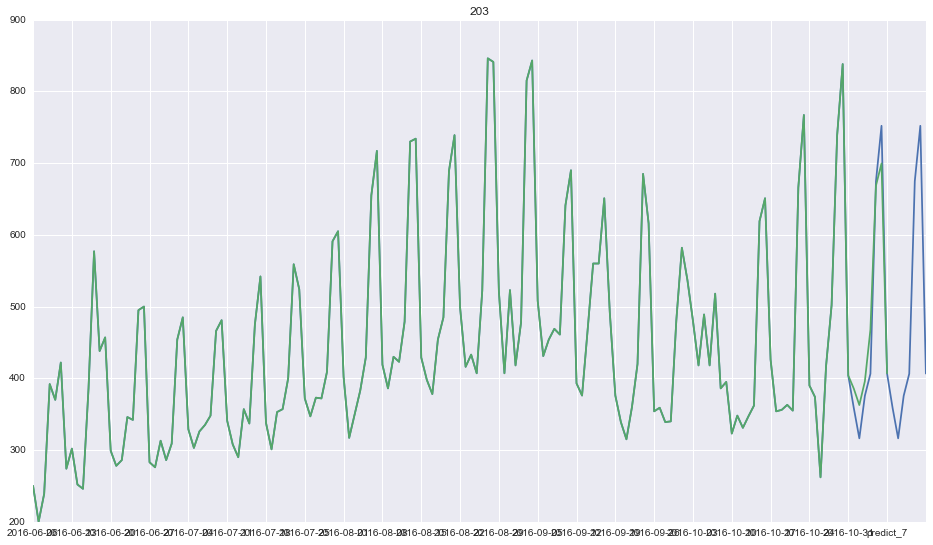

In [259]:
#i = 14
draw_rule_and_reg_id(ids_cos_sim_high_3_wk[i])
i+=1

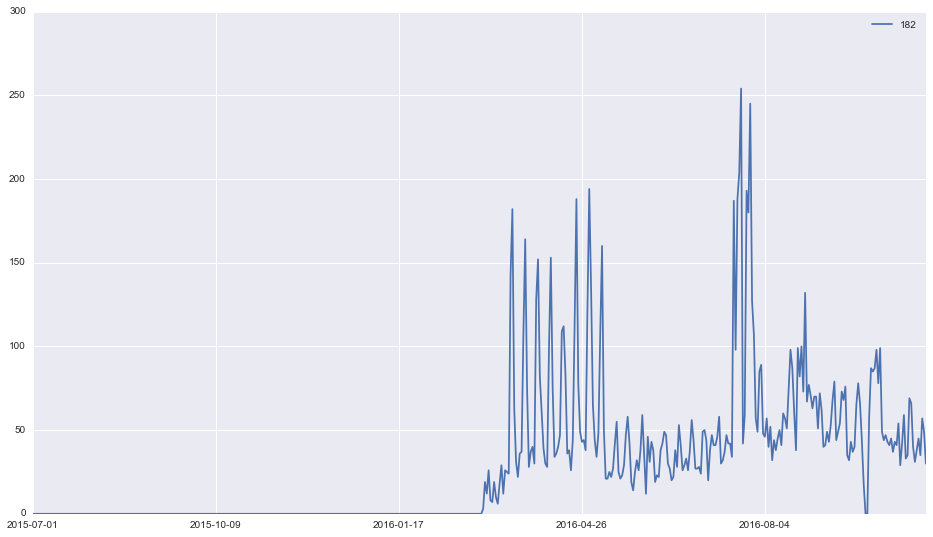

In [231]:
draw_id(182)                        

# 导出结果

In [48]:
for i in range(1,15):
    shop_info.loc[:,'predict_day_'+str(i)] = shop_info.loc[:,'predict_day_'+str(i)].apply(lambda x : int(x+0.5))
    

In [49]:
shop_info.loc[:,'predict_day_1':'predict_day_14']

,predict_day_1,predict_day_2,predict_day_3,predict_day_4,predict_day_5,predict_day_6,predict_day_7,predict_day_8,predict_day_9,predict_day_10,predict_day_11,predict_day_12,predict_day_13,predict_day_14
1,251,196,220,244,239,263,201,251,196,220,244,239,263,201
2,47,50,44,47,62,64,48,47,50,44,47,62,64,48
3,72,71,74,92,106,105,66,72,71,74,92,106,105,66
4,89,110,62,104,197,206,95,89,110,62,104,197,206,95
5,256,212,229,194,189,195,287,256,212,229,194,189,195,287
6,97,97,99,119,103,105,97,97,97,99,119,103,105,97
7,122,101,117,133,167,190,113,122,101,117,133,167,190,113
8,65,75,67,65,72,70,56,65,75,67,65,72,70,56
9,205,204,221,203,254,292,237,205,204,221,203,254,292,237
10,88,113,82,85,91,111,96,88,113,82,85,91,111,96


In [50]:
for id in shop_info.index.tolist():
    for i in range(1,15):
        if shop_info.loc[id,'predict_day_'+str(i)] <0:
            print 'ERROR'

In [146]:
#shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction (Main model 1).csv',sep=',',index=True,columns=None)

In [51]:
shop_info.loc[:,'predict_day_1':'predict_day_14'].to_csv('Prediction (Main model 2).csv',sep=',',index=True,columns=None)